# visualization of the localization procedure

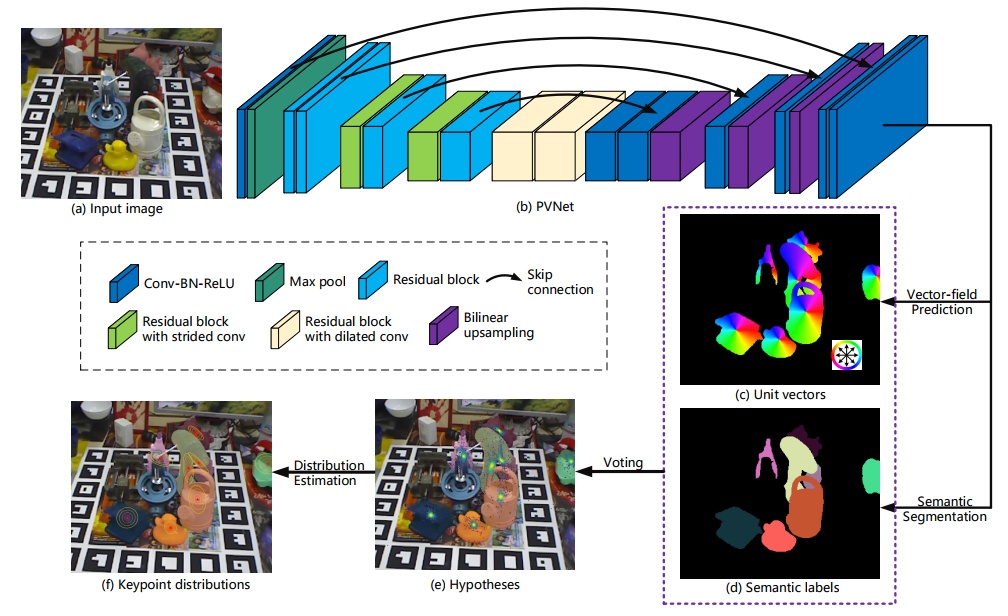

In [10]:
from tools.demo import *

net = Resnet18_8s(ver_dim=vote_num * 2, seg_dim=2)
net = NetWrapper(net).cuda()
net = DataParallel(net)

optimizer = optim.Adam(net.parameters(), lr=train_cfg['lr'])
model_dir = os.path.join(cfg.MODEL_DIR, "cat_demo")
load_model(net.module.net, optimizer, model_dir, -1)
data, points_3d, bb8_3d = read_data()
image, mask, vertex, vertex_weights, pose, corner_target = [d.unsqueeze(0).cuda() for d in data]
seg_pred, vertex_pred, loss_seg, loss_vertex, precision, recall = net(image, mask, vertex, vertex_weights)

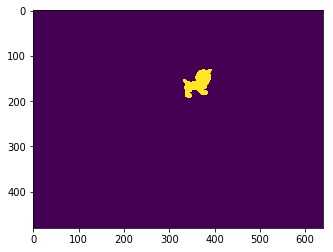

In [11]:
visualize_mask(mask)

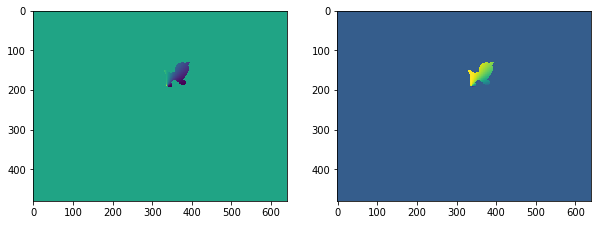

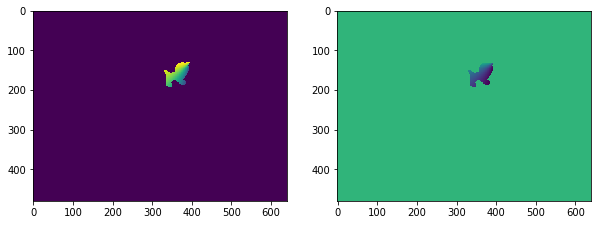

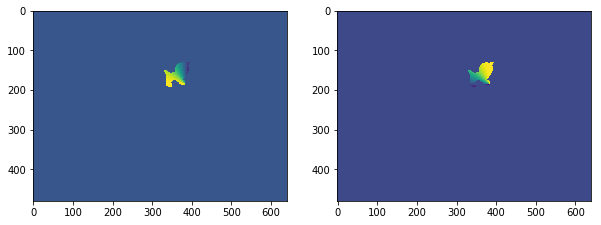

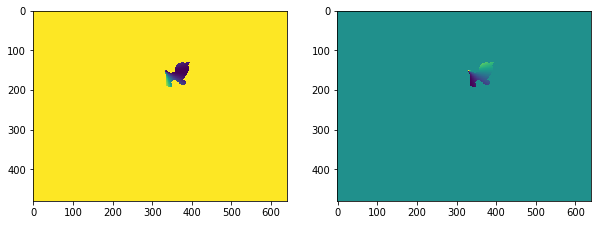

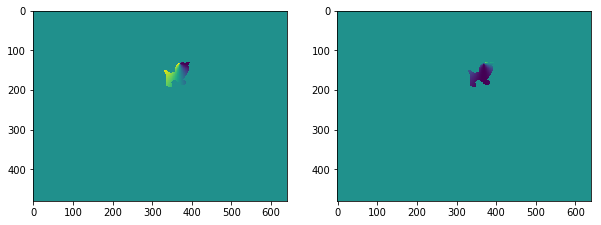

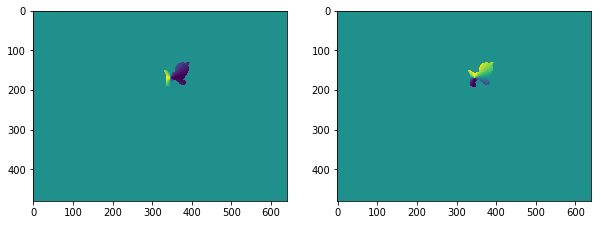

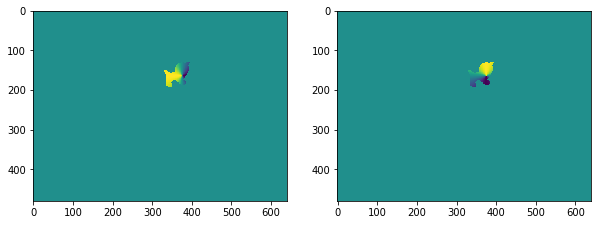

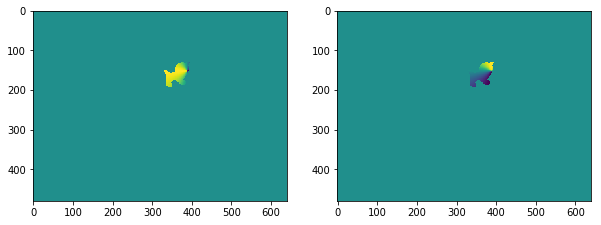

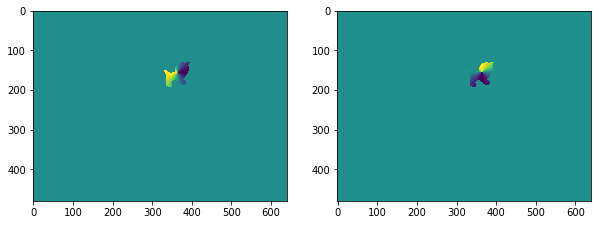

In [12]:
visualize_vertex(vertex, vertex_weights)

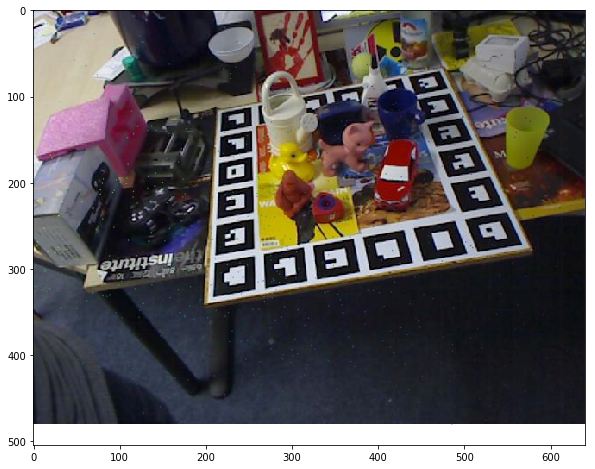

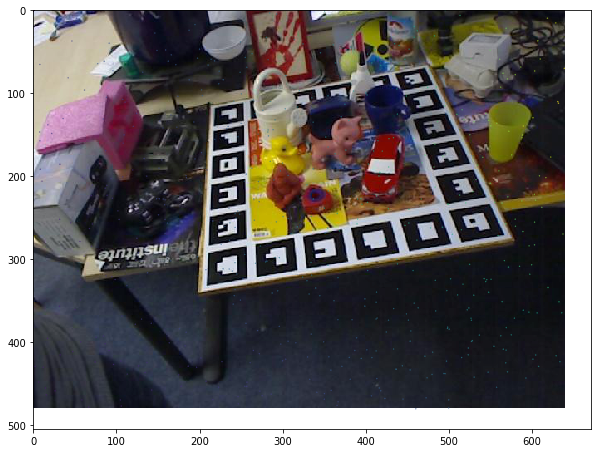

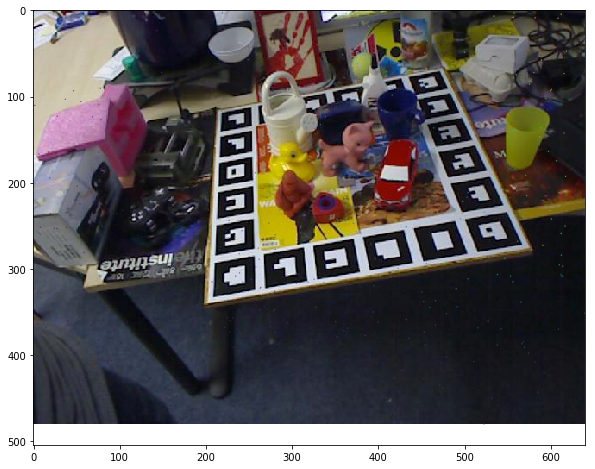

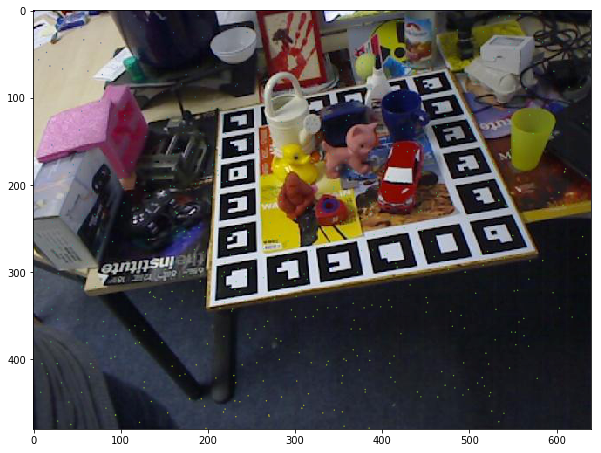

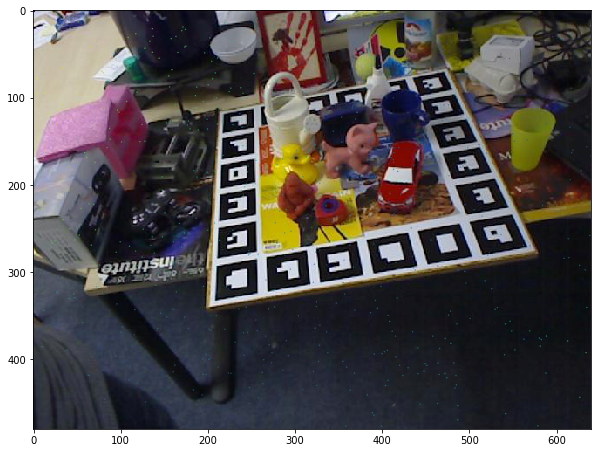

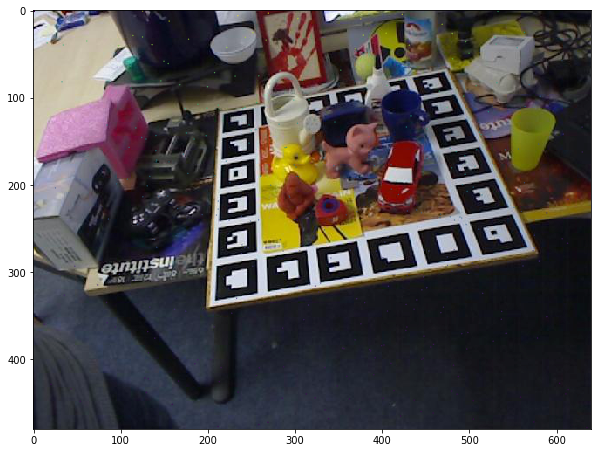

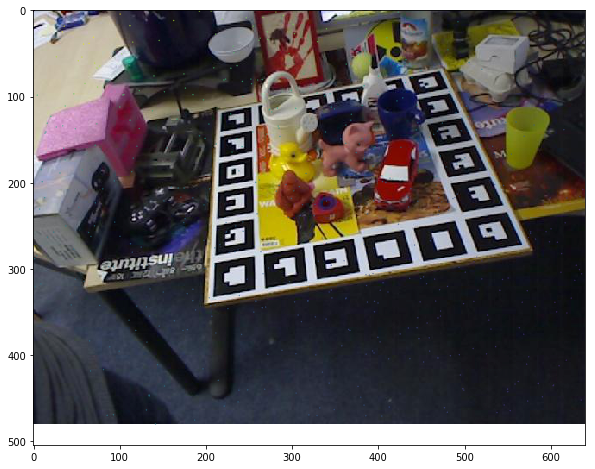

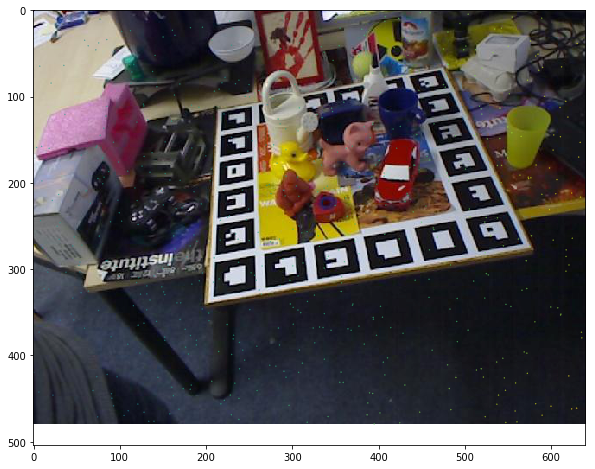

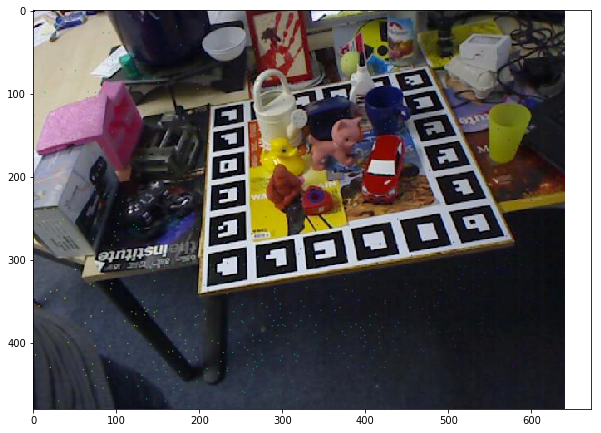

In [13]:
visualize_hypothesis(image, seg_pred, vertex_pred, corner_target)

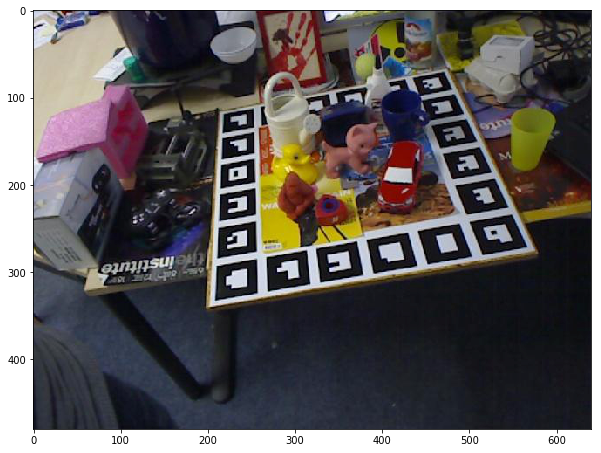

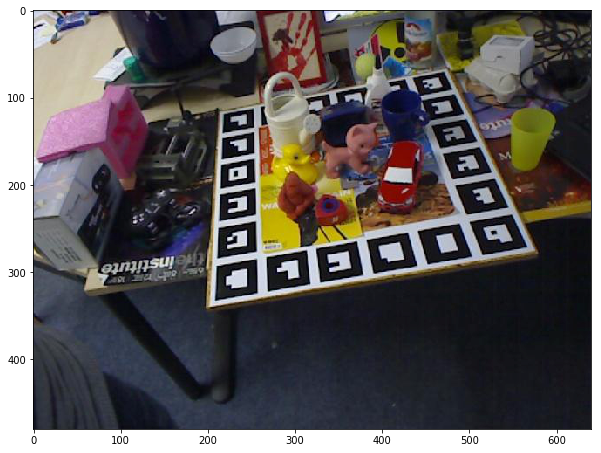

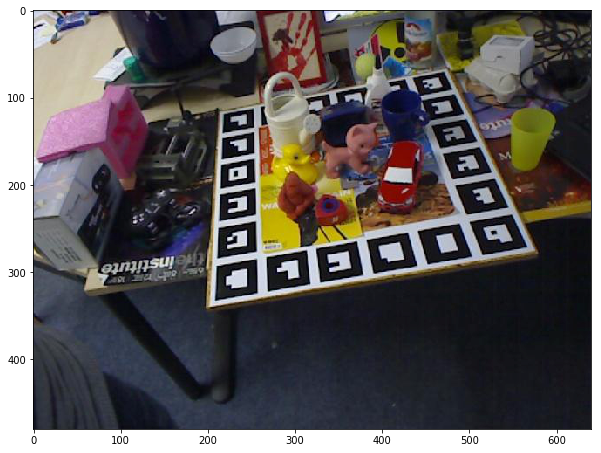

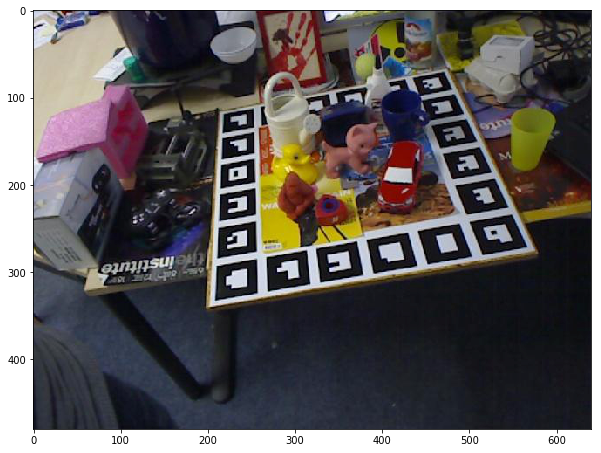

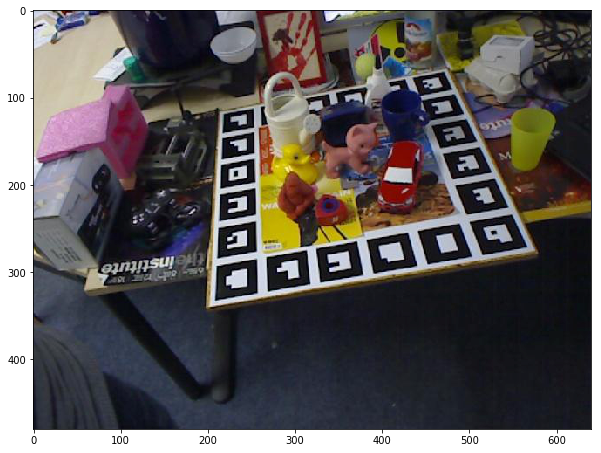

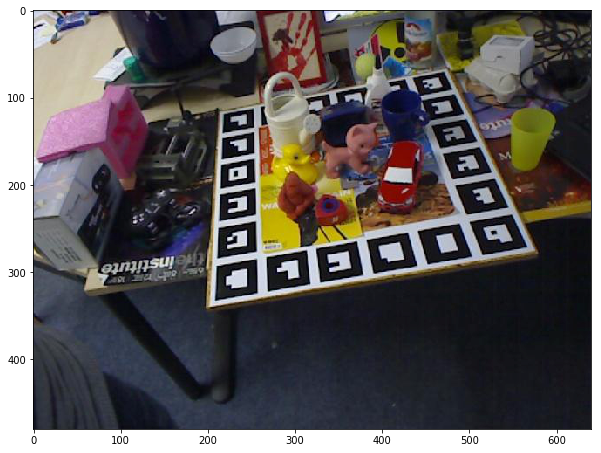

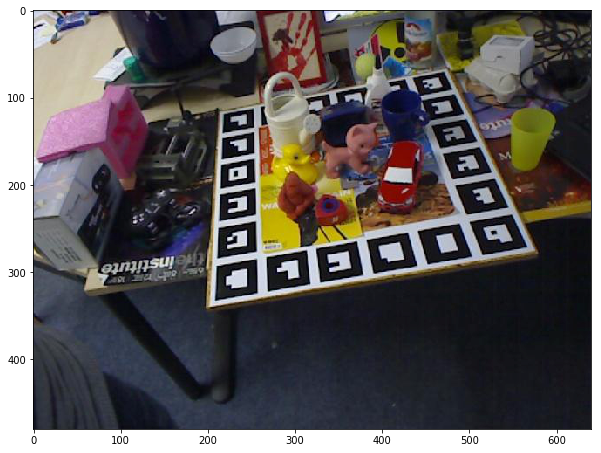

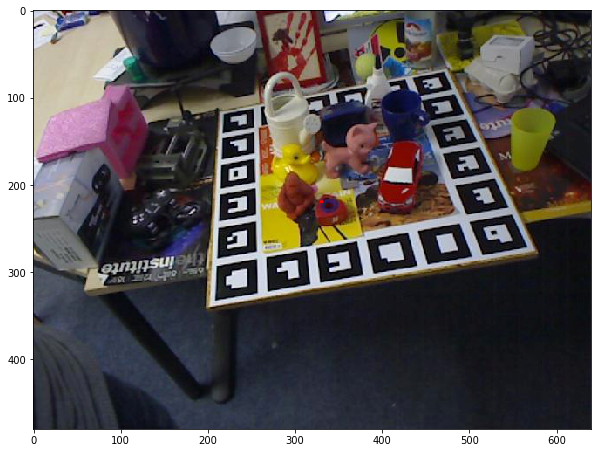

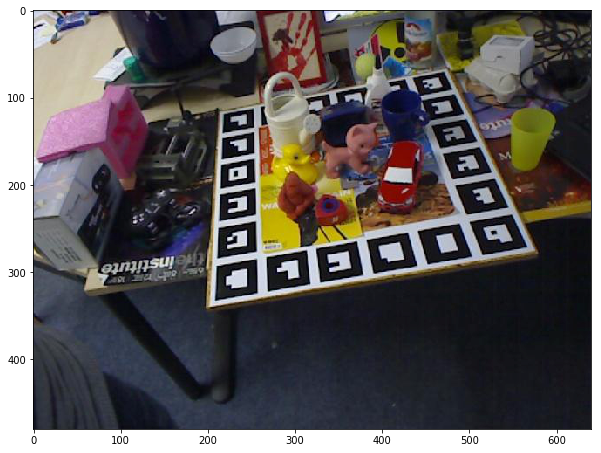

<built-in method size of Tensor object at 0x7fe5b5954960>


In [15]:
visualize_voting_ellipse(image, seg_pred, vertex_pred, corner_target)